## Plot Benchmark Results

In [1]:
import pandas as pd
import papermill as pm
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import psutil
n_cores = psutil.cpu_count(logical=True)
n_cpus = psutil.cpu_count(logical=False)
print("cores:", n_cores)
print("cpus: ", n_cpus)

cores: 8
cpus:  4


In [3]:
r = pd.read_csv('../results/Read.csv')[['cores','read']]
f = pd.read_csv('../results/Filter.csv')[['cores','filter']]
p = pd.read_csv('../results/Fingerprint.csv')[['cores','fingerprint']]
m = pd.read_csv('../results/Flatmap.csv')[['cores','flatmap']]

In [4]:
df = m.merge(p, on='cores')
df = df.merge(f, on='cores')
df = df.merge(r, on='cores')
df

,cores,flatmap,fingerprint,filter,read
0,1,7557.068324,7832.173906,1323.152774,1278.527366
1,2,3632.109765,4004.091420,696.475280,668.031833
2,3,2470.077979,2778.448527,512.475331,470.320329
3,4,1968.311103,2370.011281,419.320728,387.979400
4,8,1931.437596,2460.323359,367.797722,342.400208


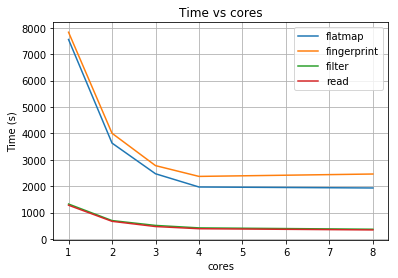

In [5]:
df.plot.line(x="cores", grid=True, title="Time vs cores")

plt.ylabel('Time (s)')
plt.xticks(np.arange(1, n_cores+1, 1))
plt.savefig('../results/Benchmark.png')
plt.show()

In [6]:
%load_ext watermark
%watermark -v -m -p matplotlib,numpy,pandas,papermill,pyspark

CPython 3.7.1
IPython 7.1.1

matplotlib 3.0.2
numpy 1.15.4
pandas 0.23.4
papermill 0.14.2
pyspark 2.4.0

compiler   : Clang 9.0.0 (clang-900.0.37)
system     : Darwin
release    : 18.2.0
machine    : x86_64
processor  : i386
CPU cores  : 8
interpreter: 64bit
